In [1]:
print("hello world")

hello world


In [2]:
print(2+2)

4


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np

In [6]:
temp_out=70.0
r=0.9

In [7]:
def cooling_law(temp_start, walk_time):
    return temp_out + (temp_start - temp_out) * r ** walk_time 

In [16]:
cooling_law(185, 10)

110.0980206115

In [20]:
times = arange(0.,21.,1.)
temperatures = cooling_law(185., times)
temperatures

array([ 185.        ,  173.5       ,  163.15      ,  153.835     ,
        145.4515    ,  137.90635   ,  131.115715  ,  125.0041435 ,
        119.50372915,  114.55335624,  110.09802061,  106.08821855,
        102.4793967 ,   99.23145703,   96.30831132,   93.67748019,
         91.30973217,   89.17875895,   87.26088306,   85.53479475,
         83.98131528])

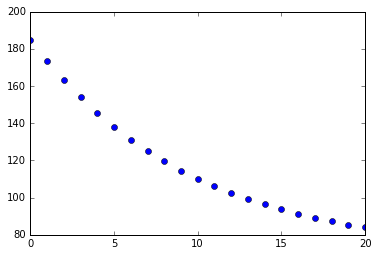

In [21]:
plot(times, temperatures, 'o')

In [22]:
def temp_mixture(t1, v1, t2, v2):
    return (t1 * v1 + t2 * v2) / (v1 + v2)

In [23]:
temp_coffee = 185.
temp_cream = 40.
vol_coffee = 8.
vol_cream = 1.
initial_temp_mix_at_shop = temp_mixture(temp_coffee, vol_coffee, temp_cream, vol_cream)
temperatures_mix_at_shop = cooling_law(initial_temp_mix_at_shop, times)
temperatures_mix_at_shop

array([ 168.88888889,  159.        ,  150.1       ,  142.09      ,
        134.881     ,  128.3929    ,  122.55361   ,  117.298249  ,
        112.5684241 ,  108.31158169,  104.48042352,  101.03238117,
         97.92914305,   95.13622875,   92.62260587,   90.36034528,
         88.32431076,   86.49187968,   84.84269171,   83.35842254,
         82.02258029])

In [25]:
temperatures_unmixed_coffee = cooling_law(temp_coffee, times)
temperatures_mix_at_office = temp_mixture(temperatures_unmixed_coffee, vol_coffee, temp_cream, vol_cream)
temperatures_mix_at_office

array([ 168.88888889,  158.66666667,  149.46666667,  141.18666667,
        133.73466667,  127.02786667,  120.99174667,  115.55923867,
        110.66998147,  106.26964999,  102.30935165,   98.74508316,
         95.53724151,   92.65018402,   90.05183229,   87.71331573,
         85.60865082,   83.7144524 ,   82.00967383,   80.47537311,
         79.09450247])

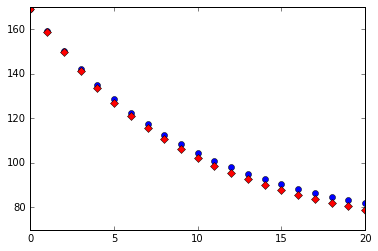

In [26]:
plot(times, temperatures_mix_at_shop, 'o')
plot(times, temperatures_mix_at_office, 'D', color='r')

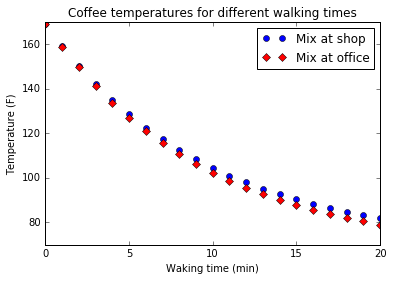

In [27]:
plot(times, temperatures_mix_at_shop, 'o')
plot(times, temperatures_mix_at_office, 'D', color='r')
title('Coffee temperatures for different walking times')
xlabel('Waking time (min)')
ylabel('Temperature (F)')
legend(['Mix at shop', 'Mix at office']) 

In [28]:
temp_coffee = 185.
vol_coffee = 8.
vol_cream = 1.
walk_time = 10.0
r = 0.9
def temperature_difference(temp_cream, temp_out):
    temp_start = temp_mixture(temp_coffee,vol_coffee,temp_cream,vol_cream)
    temp_mix_at_shop = temp_out + (temp_start - temp_out) * r ** walk_time
    temp_start = temp_coffee
    temp_unmixed =  temp_out + (temp_start - temp_out) * r ** walk_time
    temp_mix_at_office = temp_mixture(temp_unmixed, vol_coffee, temp_cream, vol_cream)
    return temp_mix_at_shop - temp_mix_at_office

In [30]:
cream_temperatures = arange(40.,51.,1.)
outside_temperatures = arange(35.,60.,1.)
cream_values, outside_values = meshgrid(cream_temperatures, outside_temperatures)
temperature_differences = temperature_difference(cream_values, outside_values)

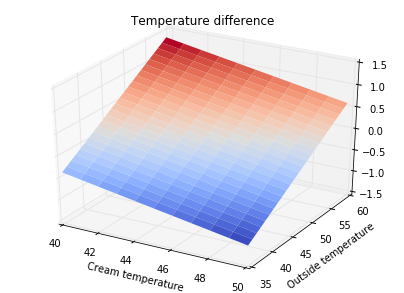

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
fig.set_size_inches(7,5)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(cream_values, outside_values, temperature_differences, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
xlabel('Cream temperature')
ylabel('Outside temperature')
title('Temperature difference') 